# L2c: Singular Value Decomposition of Systems and Data
In this lecture, we'll continue our discussion of eigendecomposition and explore a powerful technique called [Singular Value Decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition), which is closely related to eigendecomposition. There are several key ideas in this lecture:

* __Singular Value Decomposition (SVD)__ is a fundamental technique in linear algebra that decomposes a matrix $\mathbf{A}\in\mathbb{C}^{n\times{m}}$ into three distinct matrices, $\mathbf{A} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^{T}$. The matrices $\mathbf{U}$ and $\mathbf{V}$  are orthogonal matrices containing the left and right singular vectors, respectively, while the $\mathbf{\Sigma}$ is a diagonal matrix containing the singular values.
* __Singular vectors__ contained in the columns of the $\mathbf{U}$ and $\mathbf{V}$ are the eigenvectors of the matrix product $\mathbf{A}\mathbf{A}^{T}$ and $\mathbf{A}^{T}\mathbf{A}$, respectively. In cases where $\mathbf{A}$ is symmetric (square) and positive definite (positive eigenvalues), the left and right singular vectors align with the eigenvectors.
* __Singular values__ of a matrix $\mathbf{A}$ are the square roots of the non-zero eigenvalues of either $\mathbf{A}\mathbf{A}^{T}$ or $\mathbf{A}^{T}\mathbf{A}$, establishing a direct connection between these two values. In cases where $\mathbf{A}$ is symmetric (square) and positive definite (positive eigenvalues), the singular values correspond directly to the absolute values of the eigenvalues.
* __Numerical Stability__. SVD is more stable than eigendecomposition, especially in Principal Component Analysis (PCA), making it preferable for machine learning applications. Many SVD implementations are more stable than the naive QR iteration method we developed for eigendecomposition.

Lecture notes can be found: [here!](https://github.com/varnerlab/CHEME-5820-Lectures-Spring-2025/blob/main/lectures/week-2/L2c/docs/Notes.pdf)

## Setup, Data and Prerequisites
We set up the computational environment by including the `Include.jl` file, loading any needed resources, such as sample datasets, and setting up any required constants. The `Include.jl` file loads external packages, various functions that we will use in the exercise, and custom types to model the components of our problem.

In [3]:
include("Include.jl");

Fill me in here

In [5]:
frames, colors = let

    # initialize some storage
    frames = Dict{Int, Array{Int,2}}();

    # load saved simulation data
    saveddata = load(joinpath(_PATH_TO_DATA, "L2c-SavedData-CHEME-5820-S2025.jld2"))
    colors = saveddata["colors"];

    # package up the frames -
    frames[0] = saveddata["startframe"];
    frames[1] = saveddata["middleframe"];
    frames[2] = saveddata["endframe"];

    frames, colors # return this data
end;

Let's set some constants from the saved data. For what the constant does, it's permissible values, units, etc see the comments.

In [7]:
width = frames[0] |> x-> size(x, 2) # cols
height = frames[0] |> x-> size(x, 1) # rows
number_of_agents = width*height;
radius = 4; # either {4 | 8} for 2D (so far)
number_of_colors = 3; # number of states
number_of_excluded_points = 0; # how many points should we add to the exclude set

In [29]:
colors

Dict{Int16, RGB} with 3 entries:
  0 => RGB{N0f8}(1.0, 1.0, 1.0)
  2 => RGB{N0f8}(0.0, 0.0, 0.0)
  1 => RGB{N0f8}(0.498, 0.498, 0.498)

## Decomposition of Wolfram Two-Dimensional Cellular Automata Frame
Fill me in

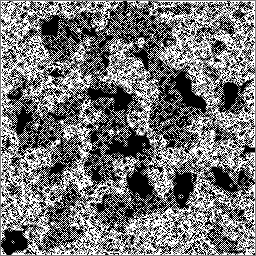

In [67]:
display_frame = let    
    frame_to_visualize = frames[1]
    my_color_dictionary = colors;
    number_of_rows = height;
    number_of_columns = width;
    new_display_frame = Array{RGB,2}(undef, number_of_rows, number_of_columns);
    for j ∈ 1:number_of_rows
        for k ∈ 1:number_of_columns
            new_display_frame[j,k] = frame_to_visualize[j,k] |> s -> my_color_dictionary[s];
        end
    end
    new_display_frame
end

Fill me in

In [11]:
f = frames[1]; # frame that I want to decompose

Fill me in

In [13]:
(U,Σ,VT) = svd(f); # compute the SVD of the frame at index i

### Compute the sub-images and store them in a dictionary
Singular value decomposition (SVD) can be thought of as decomposing a matrix into a weighted, ordered sum of separable matrices, e.g., frames of a larger image. Let $\mathbf{A}\in\mathbb{R}^{m\times{n}}$ have the singular value decomposition $\mathbf{A} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^{T}$. Then, the matrix $\mathbf{A}\in\mathbb{R}^{m\times{n}}$ can be written as:

$$
\mathbf{A} = \sum_{i=1}^{r_{\mathbf{A}}}\sigma_{i}\cdot\left(\mathbf{u}_{i}\otimes\mathbf{v}_{i}\right)
$$

where $r_{\mathbf{A}}$ is the rank of matrix $\mathbf{A}$, the vectors $\mathbf{u}_{i}$ and $\mathbf{v}_{i}$ are the ith left and right singular vectors, and $\sigma_{i}$ are the ordered singular values. The [outer-product](https://en.wikipedia.org/wiki/Outer_product) $\left(\mathbf{u}_{i}\otimes\mathbf{v}_{i}\right)$ is the separable component of the matrix $\mathbf{A}$. 

* We compute the `rank` of `image_array` using the [rank function](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.rank) and then calculate the individual frames of the image by computing the [outer product](https://en.wikipedia.org/wiki/Outer_product) of the left and right singular vectors.
* We use the [foreach iteration pattern](https://docs.julialang.org/en/v1/base/collections/#Base.foreach) as a short cut means of populating the `image_dictionary` variable. We could have used a regular `for loop.` But let's go crazy!

In [15]:
R = rank(f); # how many frames will we have?
image_dictionary = Dict{Int64,Matrix{Gray{Float64}}}();
foreach(i -> image_dictionary[i] = Σ[i]*outer(U[:,i],VT[:,i]), 1:R); # another iteration pattern???

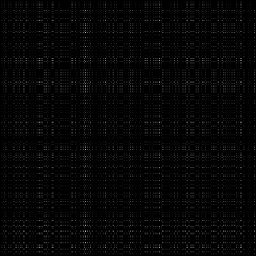

In [61]:
image_dictionary[40]

In [65]:
i = 255
Σ[i]*outer(U[:,i],VT[:,i])

256×256 Matrix{Float64}:
 -0.00161663    0.000258902  -8.64055e-5   …   0.000124813   0.000405166
  0.000246667  -3.95037e-5    1.31839e-5      -1.90441e-5   -6.18208e-5
 -0.00255806    0.000409673  -0.000136723      0.000197497   0.000641112
  0.00309557   -0.000495754   0.000165452     -0.000238995  -0.000775824
  0.00304365   -0.000487439   0.000162677     -0.000234987  -0.000762812
 -0.00425881    0.000682046  -0.000227625  …   0.000328803   0.00106736
  0.00241399   -0.0003866     0.000129023     -0.000186374  -0.000605004
  0.000683479  -0.000109459   3.65306e-5      -5.27683e-5   -0.000171296
  0.000832448  -0.000133316   4.44927e-5      -6.42696e-5   -0.000208632
 -0.000163473   2.61801e-5   -8.73729e-6       1.2621e-5     4.09702e-5
 -0.00150604    0.000241191  -8.04946e-5   …   0.000116274   0.000377449
  0.00472796   -0.00075718    0.0002527       -0.000365025  -0.00118494
  2.5574e-5    -4.09567e-6    1.36688e-6      -1.97445e-6   -6.40946e-6
  ⋮                            

### Can you reconstruct the original image by adding up all the sub-images?
Let's try to rebuild the original image by `adding up` the sub-images. Since the original image is just a matrix, we can use the structural decomposition idea to do this. 
* Grab the first `frame` from the `image_dictionary` and set this to the `M` variable. Then, iterate through the collection up to a specified `number_of_frames` of frames, where we update the `M` variable each time through the loop.

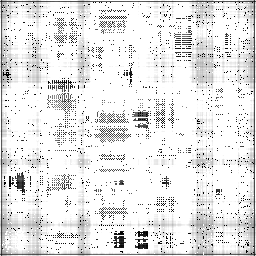

In [47]:
M = let
    reconstructed_image = image_dictionary[1];
    number_of_frames = 254;
    for i ∈ 2:number_of_frames
        reconstructed_image += (image_dictionary[i] .|> x-> Int(round(x)))
    end

    # frame_to_visualize = reconstructed_image;
    # my_color_dictionary = colors;
    # number_of_rows = height;
    # number_of_columns = width;
    # new_display_frame = Array{RGB,2}(undef, number_of_rows, number_of_columns);
    # for j ∈ 1:number_of_rows
    #     for k ∈ 1:number_of_columns
    #         new_display_frame[j,k] = frame_to_visualize[j,k] |> s -> my_color_dictionary[s];
    #     end
    # end
    # new_display_frame
    reconstructed_image
end